In [175]:
import matplotlib.pyplot as plt
import numpy as np
import random

beta=0.3
gamma=0.05
N=10000


cohort = [1] + [0] * (N - 1)
infected_count = 1
recovered_count = 0

inf = []
rec = []
sus = []

for _ in range(1000):
    new_infected_count = 0
    new_recovered_count = 0

    for i in range(N):
        if cohort[i] == 0:
            infection_prob = infected_count * (beta / N)
            cohort[i] = np.random.choice([0, 1], p=[1 - infection_prob, infection_prob])
            if cohort[i] == 1:
                new_infected_count += 1
        elif cohort[i] == 1:
            recovery_prob = gamma
            new_state = np.random.choice([1, 2], p=[1 - recovery_prob, recovery_prob])
            if new_state == 2:
                cohort[i] = 2
                new_recovered_count += 1

    infected_count += new_infected_count - new_recovered_count
    recovered_count += new_recovered_count
    
    inf.append(infected_count)
    rec.append(recovered_count)
    sus.append(N - infected_count - recovered_count)




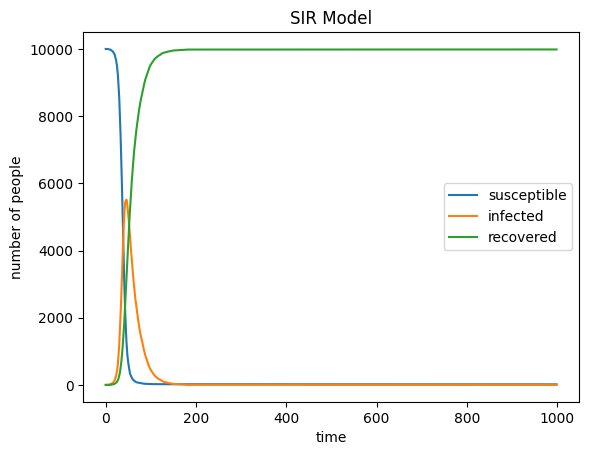

In [176]:
x=range(1000)
plt.title("SIR Model")
plt.xlabel("time")
plt.ylabel("number of people")
plt.plot(x,sus,label="susceptible")
plt.plot(x,inf,label="infected")
plt.plot(x,rec,label="recovered")
plt.legend()
